In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

def Gauss(x, A, B, C):
    return A*np.exp(-(x-B)**2/(2*C**2))

# Fázisérzékeny detektálás
Sajnálatos módon egy laptop újraindulás miatt minden itt mért adatunk elveszett, így Erdei Tanár Úr 1. számú adatait használtuk fel a kiértékeléshez.

## Háttérfény mérése sávszűrővel
Bekapcsoltuk a méréshez használt <i> lock-in </i> erősítőt és AC voltmérőt. Elsőnek a háttérből származó fényt mértük meg az AC feszültségmérővel ügyelve arra, hogy mindig jól leolvasható értéket kapjunk (ehhez a méréshatárt változtattuk, miközben a lock-in méréshatárát $30~$mV-on hagytuk, így az erősítés 1X volt). A mérést elvégeztük továbbá egy wolramszálas asztali lámpa bekapcsolása esetén is. A mért frekvenciatartományok:
* 1,5 - 50 Hz
* 50 - 150 Hz
* 150 - 500 Hz
* 500 - 1500 Hz
* 1,5 - 150 kHz

Az adatok között az $n$ indexűek a lámpa nélkül mért adatok, míg az $l$ indexűek a lámpa bekapcsolásával mért adatok

   f_min (Hz)  f_max (Hz)  V_n1 (mV)  V_n2 (mV)  V_n3 (mV)  V_n átlag (mV)  \
0         1.5        50.0       68.0      70.00       69.0           69.00   
1        50.0       150.0       93.0      91.00       92.0           92.00   
2       150.0       500.0       88.0      86.00       89.0           87.67   
3       500.0      1500.0       17.5      18.00       16.5           17.33   
4      1500.0    150000.0        3.0       2.95        2.9            2.95   

   V_l1 (mV)  V_l2 (mV)  V_l3 (mV)  V_l átlag (mV)  
0      142.0      131.0      145.0          139.33  
1      184.0      185.0      180.0          183.00  
2      175.0      180.0      175.0          176.67  
3       29.5       29.0       28.5           29.00  
4        4.2        4.4        4.5            4.37  
[0.81649658 0.81649658 1.24721913 0.62360956 0.04082483]
[6.01849003 2.1602469  2.3570226  0.40824829 0.12472191]


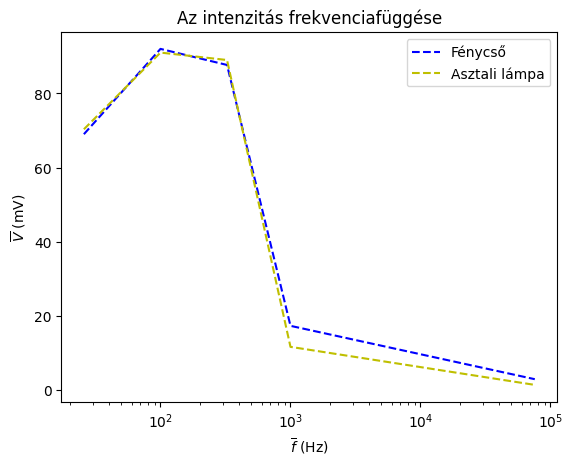

In [3]:
frek = np.array([[1.5, 50], [50, 150], [150, 500], [500, 1500], [1500, 150000]])
nemlampa = np.array([[68, 70, 69], [93, 91, 92], [88, 86, 89], [17.5, 18, 16.5], [3, 2.95, 2.9]])
lampa = np.array([[142, 131, 145], [184, 185, 180], [175, 180, 175], [29.5, 29, 28.5], [4.2, 4.4, 4.5]])
data = np.append(frek, nemlampa, axis=1)
data = np.append(data, nemlampa.mean(axis=1).reshape(5,1), axis=1)
data = np.append(data, lampa, axis=1)
data = np.append(data, lampa.mean(axis=1).reshape(5,1), axis=1)
pan = pd.DataFrame(data=np.around(data, decimals=2), columns=['f_min (Hz)', 'f_max (Hz)', 'V_n1 (mV)', 'V_n2 (mV)', 'V_n3 (mV)', 'V_n átlag (mV)', 'V_l1 (mV)', 'V_l2 (mV)', 'V_l3 (mV)', 'V_l átlag (mV)'])
print(pan)
print(nemlampa.std(axis=1))
print(lampa.std(axis=1))

fig, ax = plt.subplots()
ax.semilogx(frek.mean(axis=1), nemlampa.mean(axis=1), 'b--', label='Fénycső')
ax.semilogx(frek.mean(axis=1), lampa.mean(axis=1)-nemlampa.mean(axis=1), 'y--', label='Asztali lámpa')
ax.set_xlabel(r'$\overline{f}$ (Hz)')
ax.set_ylabel(r'$\overline{V}$ (mV)')
ax.set_title('Az intenzitás frekvenciafüggése')
ax.legend()
plt.savefig('1int'+'.pdf', format='pdf', dpi=1000, bbox_inches='tight')

## Fázismérés <i> lock-in </i> erősítővel
Bekapcsoltuk a forgatható LED-es fényforrást <i><b>PH1</b></i> állásba. A lock-in erősítőn a <i>time constant</i>-ot $1~$s-ra állítottuk, a mért frekvenciatartományt pedig $1,5~-~150~$kHz-re. Az érzékenységet és mérési tartományt $30~$mV-on hagytuk, majd megkerestük a fázis tekerőgomb segítségével azt a pozíciót, amikor az erősítő által mutatott érték maximális volt, azaz a lock-in erősítő fázisban volt a LED jelével.
Ezután átkapcsoltuk a műszert <i> phase shift </i> állásba, azaz ekkor a fázistoló értékét láthattuk. Ez az érték így pont a referenciajel és a detektor jel (LED jele) közti fáziskülönbség volt. Ugyanezt a mérést megismételtük a <i><b>PH2</b></i> állásban is, mely más fázisban volt.

In [4]:
ph1f = np.array([84, 84, 83])+180
ph2f = np.array([-11, -10, -13])+180
ph1f = np.append(ph1f, ph1f.mean())
ph2f = np.append(ph2f, ph2f.mean())

pan = pd.DataFrame(data=np.around(np.array([ph1f, ph2f]), decimals=2), index=('PH1', 'PH2'), columns=['phi_1', 'phi_2', 'phi_3', 'phi_átlag'])
print(pan)
print(f'Innen a fáziskülönbség: {ph1f[-1]-ph2f[-1]:.2f} fok')

     phi_1  phi_2  phi_3  phi_átlag
PH1  264.0  264.0  263.0     263.67
PH2  169.0  170.0  167.0     168.67
Innen a fáziskülönbség: 95.00 fok


## LED iránykarakterisztikájának mérése
A fénykibocsátó diódák, azaz LED-ek a tér különböző irányaiba különböző intenzitást sugároznak ki, ezt mértük ebben a részben. A LED-ünket tartalmazó forgatható tartót forgattuk néhány ($2^\circ$) fokonként, miközben mértük a lock-in feszültséget (mely arányos az intenzitással) és a háttérfény zajfeszültségét. Az előző feladat fázistolását hagytuk meg itt is, hogy maximális legyen a kezdeti ($0^\circ$) jel.
Kifejezetten figyeltünk a méréshatárokra több szempontból is:
* A műszer $1~$mV méréshatárban az egyébként $1~$mV értéket csak $0,92~$mV-nak, míg $0,3~$mV méréshatárban az $1~$mV méréshatárban mért $0,3~$mV értéket csak $0,23~$mV-nak mutatja, így ezekkel a faktorokkal az ilyen méréshatárú méréseknél visszaszoroztunk: $\frac{1}{0,92}$ és $\frac{1\cdot0.3}{0,92\cdot 0,23}$
* A műszer kisebb méréshatárokon erősítést eszközöl, mely $10~$dB méréshatáronként ($30~$mV nál az erősítés egységnyi), így a háttér mérésekor ezekkel a faktorokkal le kell osztani ($\sqrt{10}$, $10$, $10\cdot\sqrt{10}$, stb.)

Elvégeztük ezeket a korrekciókat is és a lock-in feszültséget is normáltuk a $0^\circ$-ban mért értékkel

     phi  V_lockin  V_háttér  Méréshatár
0   -6.0      2.10      91.0         3.0
1   -4.0      6.40      88.0        10.0
2   -2.0      9.60      91.0        10.0
3    0.0     14.50      94.0        30.0
4    2.0     14.20      93.0        30.0
5    4.0     13.60      93.0        30.0
6    6.0     14.00      92.0        30.0
7    8.0     16.80      96.0        30.0
8   10.0     13.00      92.0        30.0
9   12.0     10.00      91.0        10.0
10  14.0      4.60      91.0        10.0
11  16.0      3.80      90.0        10.0
12  18.0      3.20      90.0        10.0
13  20.0      1.90      88.0         3.0
14  22.0      1.05      88.0         3.0
15  24.0      0.70      89.0         1.0
16  26.0      0.60      89.0         1.0
17  28.0      0.45      89.0         1.0
18  30.0      0.30      73.0         0.3
19  32.0      0.26      73.0         0.3
20  34.0      0.23      73.0         0.3
21  36.0      0.21      73.0         0.3
22  38.0      0.20      73.0         0.3
23  40.0      0.

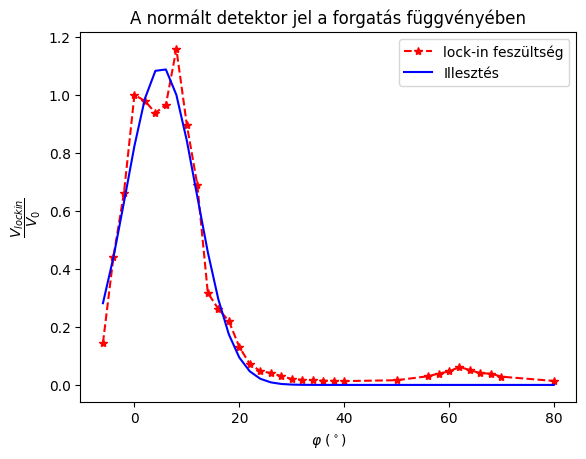

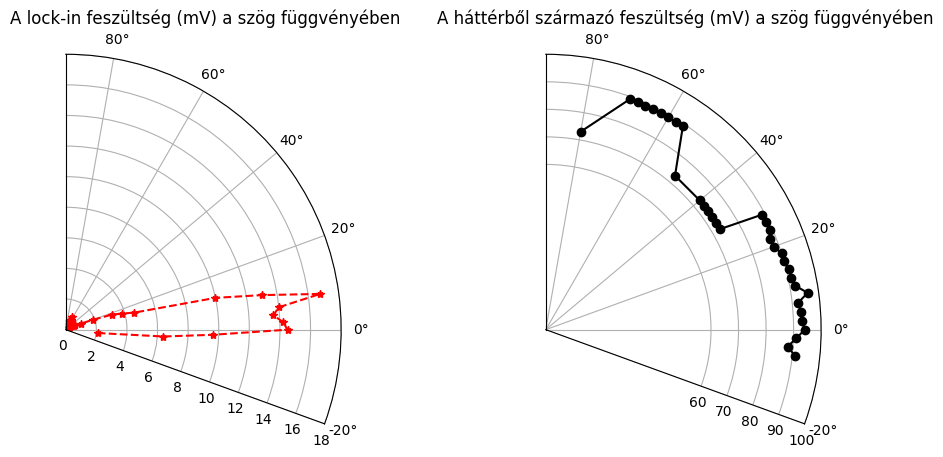

In [5]:
szog = np.arange(-6, 82, 2) # +-0,2 fok
szog = np.delete(szog, [24, 25, 26, 27, 29, 30, 39, 40, 41, 42])

lockin = np.array([2.10,6.40,9.60,14.5,14.2,13.6,14.0,16.8,13.0,10.0,4.60,3.80,3.20,1.90,1.05,0.640,0.550,0.410,0.210,0.180,0.165,0.150,0.140,0.135,0.165,0.400,0.520,0.620,0.830,0.680,0.540,0.520,0.380,0.140])
zajv = np.array([910,280,290,94,93,93,92,96,92,290,290,285,285,880,880,2600,2600,2600,5200,5200,5200,5200,5200,5200,5200,2600,2600,2600,2600,2600,2600,2600,2600,5200])
meresh = np.array([3,10,10,30,30,30,30,30,30,10,10,10,10,3,3,1,1,1,0.3,0.3,0.3,0.3,0.3,0.3,0.3,1,1,1,1,1,1,1,1,0.3])

lockin[meresh==1.]=lockin[meresh==1.]/0.92
lockin[meresh==0.3]=lockin[meresh==0.3]*0.3/(0.92*0.23)

zajv[np.where(meresh==10)]=zajv[np.where(meresh==10)]/np.sqrt(10)
zajv[np.where(meresh==3)]=zajv[np.where(meresh==3)]/10
zajv[np.where(meresh==1)]=zajv[np.where(meresh==1)]/(np.sqrt(10)*10)/0.92
zajv[np.where(meresh==0.3)]=zajv[np.where(meresh==0.3)]/100*0.3/(0.92*0.23)


data = np.append(szog.reshape(34, 1), np.around(lockin.reshape(34, 1), decimals=2), axis=1)
data = np.append(data, zajv.reshape(34, 1), axis=1)
data = np.append(data, meresh.reshape(34, 1), axis=1)

pan = pd.DataFrame(data, columns=['phi', 'V_lockin', 'V_háttér', 'Méréshatár'])
print(pan)
# print(pan.to_latex(index=False, column_format='c|c c c c', decimal=','))

lockin2 = lockin / lockin[szog==0]

[par, cov] = curve_fit(f=Gauss, xdata=szog, ydata=lockin2, p0=[1.4, 4, 2], bounds=([1, -10, 0.0001], [2, 10, 10]))
print(par, cov)

fig, ax = plt.subplots()
ax.plot(szog, lockin2, 'r--*', label='lock-in feszültség')
ax.plot(szog, Gauss(szog, par[0], par[1], par[2]), 'b-', label='Illesztés')
ax.set_xlabel(r'$\varphi$ ($^\circ$)')
ax.set_ylabel(r'$\dfrac{V_{lockin}}{V_0}$')
ax.set_title('A normált detektor jel a forgatás függvényében')
ax.legend()
plt.savefig('3kar'+'.pdf', format='pdf', dpi=1000, bbox_inches='tight')

fig, ax = plt.subplots(ncols=2, subplot_kw={'projection': 'polar'})
ax[0].plot(szog/360*2*np.pi, lockin, 'r--*')
ax[0].set_title('A lock-in feszültség (mV) a szög függvényében')
ax[0].set_rmax(18)
ax[0].grid(True)
ax[0].set_rlabel_position(-22.5)
ax[0].set_thetamin(-20)
ax[0].set_thetamax(90)

ax[1].plot(szog/360*2*np.pi, zajv, 'k-o')
ax[1].set_title('A háttérből származó feszültség (mV) a szög függvényében')
ax[1].set_rmax(100)
ax[1].set_rticks([60, 70, 80, 90,100])
ax[1].grid(True)
ax[1].set_rlabel_position(-22.5)
ax[1].set_thetamin(-20)
ax[1].set_thetamax(90)
fig.subplots_adjust(right=1.5)
plt.savefig('3pol'+'.pdf', format='pdf', dpi=1000, bbox_inches='tight')

## Sűrűségmérés fényáteresztés vizsgálatával
Visszaállítottuk a LED-et $0^\circ$-os állásba, majd felráztuk a csiszolópor elegyet és az útjába raktuk. A lock-in időállandóját átállítottuk $10~$s-ra, az érzékenységet pedig $1~$mV-ra, így leolvasható jelet kaptunk. Sok ideig mértük a feszültség változását, ahogy a csiszolópor folyamatosan ülepedett le. Láthatjuk, hogy a feszültség a leülepedéssel nőtt, azaz a LED útja tisztult, ahogy azt várnánk.

In [0]:
tt = np.array([0,1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50], dtype=int)
fesz = np.array([[0.190, 0.200], [0.170, 0.250], [0.165, 0.265], [0.170, 0.272], [0.172, 0.278], [0.177, 0.282], [0.180, 0.288], [0.182, 0.292], [0.185, 0.295], [0.188, 0.300], [0.190, 0.305], [0.205, 0.320], [0.220, 0.335], [0.230, 0.350], [0.248, 0.363], [0.265, 0.380], [0.282, 0.392], [0.302, 0.417], [0.322, 0.437]], dtype=float)

In [49]:

data = pd.DataFrame({'V_lockin1 (mV)': fesz[:,0], 'V_lockin2 (mV)': fesz[:,1]}, index=tt)
print(data.to_latex(column_format='c|c c c c', decimal=',', float_format="%.2f pm 0,02"))

\begin{tabular}{c|c c c c}
\toprule
{} &  V\_lockin1 (mV) &  V\_lockin2 (mV) \\
\midrule
0  &  \$0,19 pm 0,02\$ &  \$0,20 pm 0,02\$ \\
1  &  \$0,17 pm 0,02\$ &  \$0,25 pm 0,02\$ \\
2  &  \$0,17 pm 0,02\$ &  \$0,27 pm 0,02\$ \\
3  &  \$0,17 pm 0,02\$ &  \$0,27 pm 0,02\$ \\
4  &  \$0,17 pm 0,02\$ &  \$0,28 pm 0,02\$ \\
5  &  \$0,18 pm 0,02\$ &  \$0,28 pm 0,02\$ \\
6  &  \$0,18 pm 0,02\$ &  \$0,29 pm 0,02\$ \\
7  &  \$0,18 pm 0,02\$ &  \$0,29 pm 0,02\$ \\
8  &  \$0,18 pm 0,02\$ &  \$0,29 pm 0,02\$ \\
9  &  \$0,19 pm 0,02\$ &  \$0,30 pm 0,02\$ \\
10 &  \$0,19 pm 0,02\$ &  \$0,30 pm 0,02\$ \\
15 &  \$0,20 pm 0,02\$ &  \$0,32 pm 0,02\$ \\
20 &  \$0,22 pm 0,02\$ &  \$0,34 pm 0,02\$ \\
25 &  \$0,23 pm 0,02\$ &  \$0,35 pm 0,02\$ \\
30 &  \$0,25 pm 0,02\$ &  \$0,36 pm 0,02\$ \\
35 &  \$0,27 pm 0,02\$ &  \$0,38 pm 0,02\$ \\
40 &  \$0,28 pm 0,02\$ &  \$0,39 pm 0,02\$ \\
45 &  \$0,30 pm 0,02\$ &  \$0,42 pm 0,02\$ \\
50 &  \$0,32 pm 0,02\$ &  \$0,44 pm 0,02\$ \\
\bottomrule
\end{tabular}



C:\Users\schba\AppData\Local\Temp\ipykernel_27512\597656176.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(data.to_latex(column_format='c|c c c c', decimal=',', float_format="$%.2f pm 0,02$"))


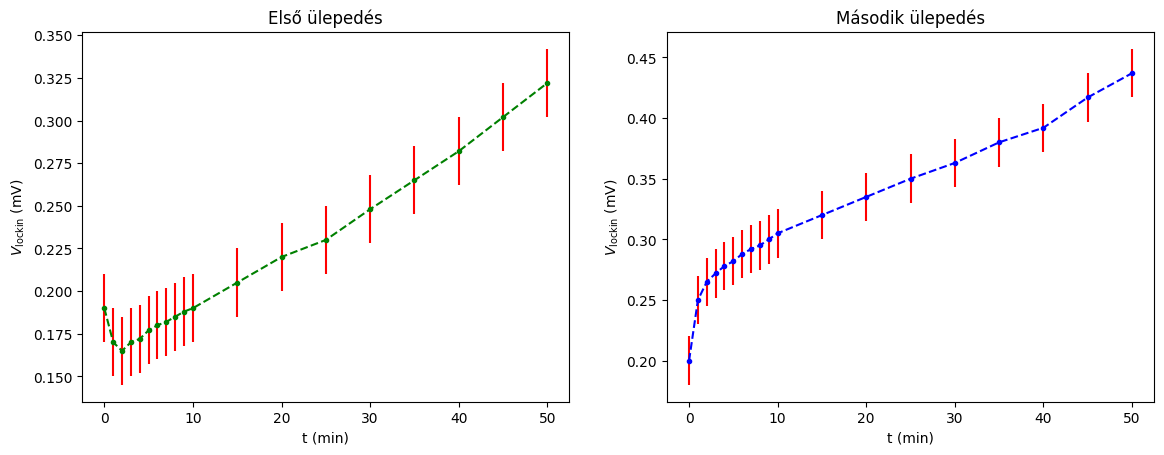

In [69]:

fig, ax = plt.subplots(ncols=2)
ax[0].errorbar(tt, fesz[:,0], yerr=np.ones(len(tt))*0.02, fmt='g--.', ecolor='r')
ax[0].set_xlabel(r't (min)')
ax[0].set_ylabel(r'$V_\mathrm{lockin}$ (mV)')
ax[0].set_title('Első ülepedés')

ax[1].errorbar(tt, fesz[:,1], yerr=np.ones(len(tt))*0.02, fmt='b--.', ecolor='r')
ax[1].set_xlabel(r't (min)')
ax[1].set_ylabel(r'$V_\mathrm{lockin}$ (mV)')
ax[1].set_title('Második ülepedés')
fig.subplots_adjust(right=1.8)
plt.savefig('4ab'+'.pdf', format='pdf', dpi=1000, bbox_inches='tight')

# Hidrogén és LED-ek színképének vizsgálata

## A spektrométer kalibrálása
![](spektrometer.png)

Méréshez használt eszközök: PGS-2 spektrométer (elvi működést lásd fenti ábrán), hidrogén kisülési lámpa, tápegység.
Célunk a PGS-2 spektrométer kalibrálása a Balmer formula segítségével, mivel a Rydberg-állandóban szereplő paraméterek függetlenek a környezeti paraméterektől ($R_{\infty}=\frac{m\cdot e^4}{8\cdot c\cdot \epsilon_0^2\cdot h^3}$). A hidrogén kisülési lámpa fényében bár több emissziós sorozat is megjelenik, ezekből a Balmer sorozat esik a látható tartományba, és itt érzékeny a detektornak használt fotoelektron sokszorozó is.

Miután bekapcsolásra kerültek a méréshez használt eszközök, a fotoelektron sokszorozó feszültségét a laborvezető 600 V értékűre állította. A be- és kilépő rések elvileg 0,1 mm szélesek voltak. A mintvételezést a spektrométer adatgyűjtő programjának segítségével hajtottuk végre. A hullámhossz kalibrálásához kikapcsoltuk a normálás funkciót.
Az
$$\lambda=\frac{1}{R_{\infty}\cdot \Big(\frac{1}{n_0^2}-\frac{1}{n_1^2}\Big)}$$
képlet alapján a Balmer-sororzat első 4 elemének hullámhossza kiszámolható (itt $R_H\approx 1,0968\cdot 10^7 \mathrm{m^{-1}}, n_0=2 \mathrm{\ és\ } n_1=3, 4, 5, 6$):


In [7]:
R=1.0968e7
n0=2
n1=np.array([3,4,5,6],dtype=int)
lam=1/R/(1/n0**2-1/n1**2)
#print(lam*1e9)

data = pd.DataFrame(np.append(n1.reshape(4,1),np.around(lam.reshape(4,1)*1e9,2),axis=1), columns=["n_1","Hullámhossz (nm)"],index=[1,2,3,4])
print(data)

   n_1  Hullámhossz (nm)
1  3.0            656.46
2  4.0            486.26
3  5.0            434.16
4  6.0            410.28


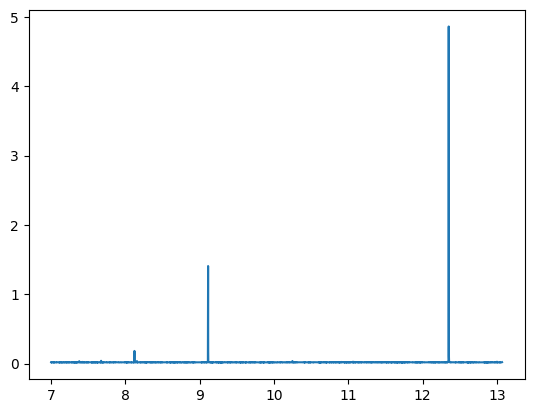

In [8]:
Hdata = np.loadtxt('Hszinkep',
                  dtype=float)

szog = Hdata[:, 0]
I = Hdata[:, 2]
plt.plot(szog,I)
plt.show()
#print(szog[np.where(I>0.03)])
theta=np.array([12.35,9.11,8.12,7.67])/180*np.pi
G=651.5
f=2075
x=-2
lamszamolt=2/G*np.sin(theta)+x*np.cos(theta)/f/G
#print(lamszamolt*1e6)

A $$\lambda=\frac{2}{G}\cdot sin(\theta)+ x\cdot \frac{cos(\theta)}{f\cdot G} [mm]$$ képlet alapján a hullámhossz a szög ismeretében számolható (G=651,5 1/mm; f=2075 mm; x=-2 mm):


In [9]:
data2 = pd.DataFrame(np.append(np.around(theta.reshape(4,1)/np.pi*180,2),np.around(lam.reshape(4,1)*1e9,2),axis=1), columns=["Szög","Hullámhossz (nm)"],index=[1,2,3,4])
print(data2)

    Szög  Hullámhossz (nm)
1  12.35            656.46
2   9.11            486.26
3   8.12            434.16
4   7.67            410.28


## LED spektruma
A belépő rés elé különböző színű LED-eket tettünk úgy, hogy figyeltünk arra, hogy a detektor a mérés során ne menjen telítésbe. A tápegységen először 20, majd 30 mV-ot állítottunk be, majd a mérőprogram segítségével rögzítettük az adott LED színtartományának megfelelő spektrumot. Itt már használtuk a normálás funkciót. A mérési tartományt úgy határoztuk meg, hogy a maximális mért feszültség századrészénél megmértük mindkét irányban a szöget, és ezt adtuk meg a programnak.

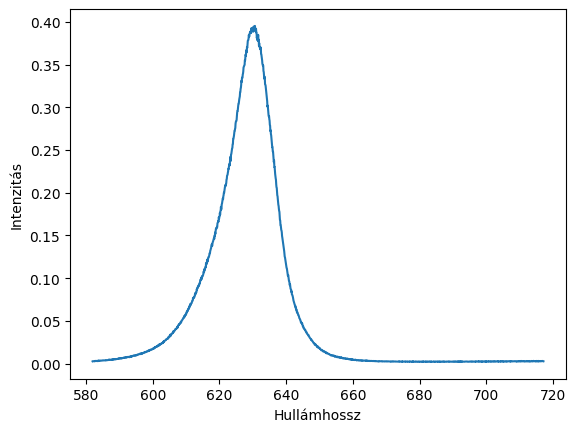

In [10]:
datap20 = np.loadtxt('Pirosled_20mA',
                  dtype=float)

szogp20 = datap20[:, 0]
lamp20= datap20[:, 1]
Ip20 = datap20[:, 2]
plt.plot(lamp20,Ip20)
plt.xlabel("Hullámhossz")
plt.ylabel("Intenzitás")
plt.show()


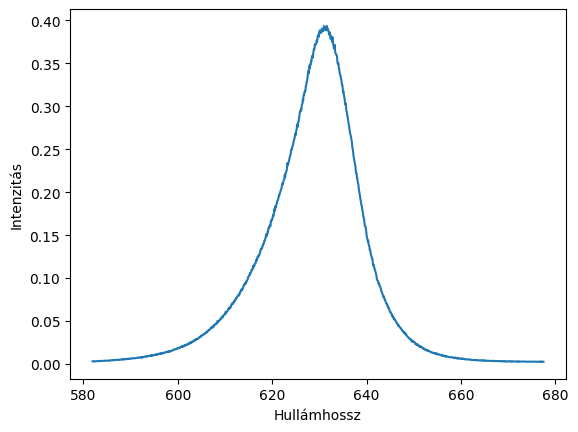

In [11]:
datap30 = np.loadtxt('Pirosled_30mA',
                  dtype=float)

szogp30 = datap30[:, 0]
lamp30= datap30[:, 1]
Ip30 = datap30[:, 2]
plt.plot(lamp30,Ip30)
plt.xlabel("Hullámhossz")
plt.ylabel("Intenzitás")
plt.show()

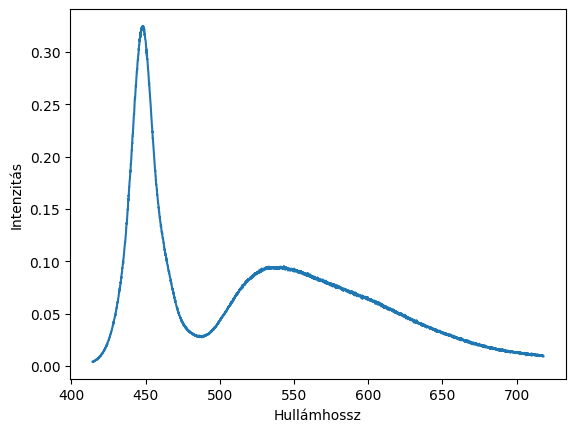

In [12]:
dataf20 = np.loadtxt('Feherled_20mA',
                  dtype=float)

szogf20 = dataf20[:, 0]
lamf20= dataf20[:, 1]
If20 = dataf20[:, 2]
plt.plot(lamf20,If20)
plt.xlabel("Hullámhossz")
plt.ylabel("Intenzitás")
plt.show()

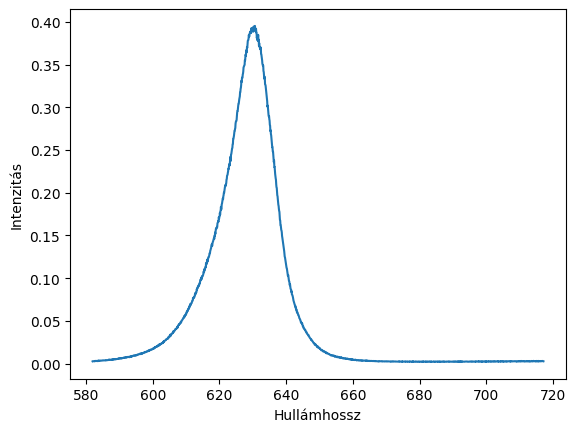

In [13]:
dataf30 = np.loadtxt('Pirosled_20mA',
                  dtype=float)

szogf30 = dataf30[:, 0]
lamf30= dataf30[:, 1]
If30 = dataf30[:, 2]
plt.plot(lamf30,If30)
plt.xlabel("Hullámhossz")
plt.ylabel("Intenzitás")
plt.show()